In [103]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [104]:
# Constants
GRAPH_PERCEPTION = False
CHART_TITLE = "with Perception" if GRAPH_PERCEPTION else "without Perception"
CUMULATIVE_STATS_FOLDER_PATH = './evaluation_outputs/cumulative_stats_with_perception' if GRAPH_PERCEPTION else './evaluation_outputs/cumulative_stats_no_perception'

In [105]:
def get_stats_df(file_path=""):
    """
    Load a DataFrame from a pickle file.

    Args:
    file_path (str): The path of the pickle file.

    Returns:
    pd.DataFrame: The DataFrame loaded from the pickle file.
    """
    if not os.path.exists(file_path):
        print(f"Cannot find file {file_path}")
        return None

    try:
        with open(file_path, 'rb') as picklefile:
            stats_df = pickle.load(picklefile)
        return stats_df
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")

In [106]:
def create_box_plot(data, x, y, labels):
    """
    Create a box plot using seaborn.

    Args:
    data (pd.DataFrame): The DataFrame containing the data to be plotted.
    x (str): The column name for the x-axis variable.
    y (str): The column name for the y-axis variable.
    labels (dict): A dictionary containing the labels for the plot (xlabel, ylabel, title).

    Returns:
    Axes: The axis object containing the box plot.
    """
    ax = sns.boxplot(data=data, x=x, y=y)
    ax.set(xlabel=labels['xlabel'],
           ylabel=labels['ylabel'],
           title=labels['title'])
    return ax

In [107]:
def create_scatter_plot(data, x, y, labels):
    """
    Create a scatter plot using seaborn.

    Args:
    data (pd.DataFrame): The DataFrame containing the data to be plotted.
    x (str): The column name for the x-axis variable.
    y (str): The column name for the y-axis variable.
    labels (dict): A dictionary containing the labels for the plot (xlabel, ylabel, title).

    Returns:
    Axes: The axis object containing the scatter plot.
    """
    ax = sns.scatterplot(data=data, x=x, y=y)
    ax.set(xlabel=labels['xlabel'],
           ylabel=labels['ylabel'],
           title=labels['title'])
    return ax

In [108]:
def save_ax(ax=None, file_path=""):
    """
    Save the plot to a file.

    Args:
    ax (Axes): The axis object containing the plot.
    file_path (str): The path where the plot should be saved.
    """
    if not file_path or not ax:
        print("File path or axis object not provided.")
        return

    ax.figure.savefig(file_path)
    print(f"Saved file: {file_path}")

In [109]:
def plot_simulation_time():
    sim_time_df_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/df_total_sim_time'
    sim_stats_df = get_stats_df(sim_time_df_path)

    labels = {"xlabel": 'Number of Cars',
              "ylabel": 'Total Runtime (s)',
              "title": f'Total Runtime per Number of Cars ({CHART_TITLE})'}

    print(sim_stats_df)
    print(get_stats_df(f'{CUMULATIVE_STATS_FOLDER_PATH}/df_total_sim_time_cumstats'))

    # Box plot
    ax = create_box_plot(data=sim_stats_df, x='num_cars', y='time_s', labels=labels)
    save_file_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/total_sim_time_boxplot.png'
    save_ax(ax, save_file_path)
    plt.show()
    plt.clf()

    # Scatter plot
    ax = create_scatter_plot(data=sim_stats_df, x='num_cars', y='time_s', labels=labels)
    save_file_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/total_sim_time_scatterplot.png'
    save_ax(ax, save_file_path)
    plt.show()
    plt.clf()

In [110]:
def plot_step_time():
    step_time_df_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/df_step_time'
    sim_stats_df = get_stats_df(step_time_df_path)

    labels = {"xlabel": 'Number of Cars',
              "ylabel": 'Simulation Step Time (ms)',
              "title": f'Simulation Step Time per Number of Cars ({CHART_TITLE})'}

    print(sim_stats_df)
    print(get_stats_df(f'{CUMULATIVE_STATS_FOLDER_PATH}/df_step_time_cumstats'))

    # Box plot
    ax = create_box_plot(data=sim_stats_df, x='num_cars', y='step_time_ms', labels=labels)
    save_file_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/step_time_boxplot.png'
    save_ax(ax, save_file_path)
    plt.show()
    plt.clf()

    # Scatter plot
    ax = create_scatter_plot(data=sim_stats_df, x='num_cars', y='step_time_ms', labels=labels)
    save_file_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/step_time_scatterplot.png'
    save_ax(ax, save_file_path)
    plt.show()
    plt.clf()

In [111]:
def plot_comparison_chart(data):
    # Plotting
    sns.set_style("whitegrid")
    sns.set_palette("deep")
    sns.set_context("talk")

    plt.plot(data['num_vehicles'], data['eCloudSim'], marker='o')
    plt.plot(data['num_vehicles'], data['openCDA'], marker='o')

    plt.xlabel('Number of Vehicles')
    plt.xticks(data['num_vehicles'])
    plt.ylabel('Total Simulation Time (s)')
    plt.title('Simulation Time with Perception on a Single Node\n(Multi2lane Scenario)')

    plt.legend(['eCloudSim', 'Original OpenCDA'])

    plt.ylim([200, 550])

    plt.show()

  num_cars      time_s        run_timestamp
0        4   63.051738  2023-03-10 03:18:45
1        4   87.436837  2023-03-10 03:21:21
2        8   78.908627  2023-03-10 03:24:26
3        8   74.182414  2023-03-10 03:29:08
4       16  119.069339  2023-03-10 03:32:00
5       16  241.972453  2023-03-10 03:36:45
6       16  141.505448  2023-04-21 18:13:34
   num_cars        std        mean      median         min         max
0         4  17.242869   75.244287   75.244287   63.051738   87.436837
1         8   3.341937   76.545520   76.545520   74.182414   78.908627
2        16  65.449947  167.515747  141.505448  119.069339  241.972453
Saved file: ./evaluation_outputs/cumulative_stats_no_perception/total_sim_time_boxplot.png


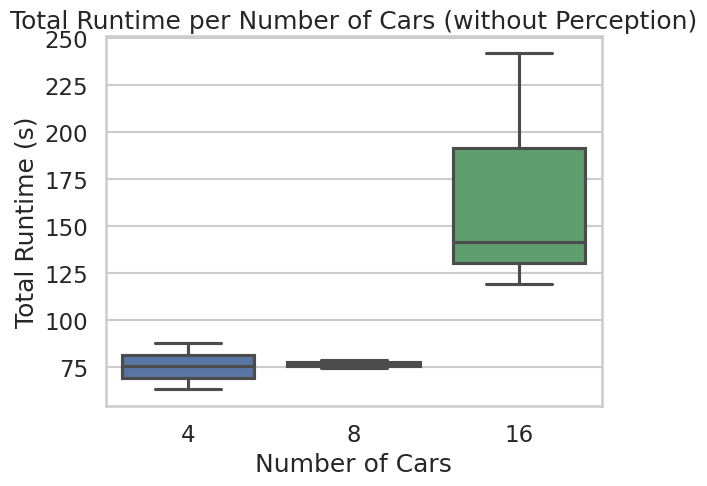

Saved file: ./evaluation_outputs/cumulative_stats_no_perception/total_sim_time_scatterplot.png


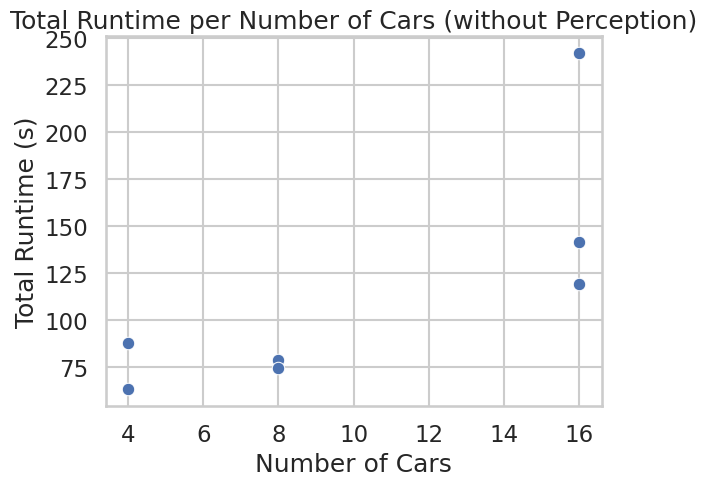

     num_cars  step_time_ms        run_timestamp
0           4     22.483826  2023-03-10 03:18:45
1           4     20.382166  2023-03-10 03:18:45
2           4     24.068356  2023-03-10 03:18:45
3           4     24.688005  2023-03-10 03:18:45
4           4     25.823355  2023-03-10 03:18:45
...       ...           ...                  ...
2616       16     93.348742  2023-04-21 18:13:34
2617       16     90.483189  2023-04-21 18:13:34
2618       16     86.823225  2023-04-21 18:13:34
2619       16     88.400841  2023-04-21 18:13:34
2620       16     96.856117  2023-04-21 18:13:34

[2621 rows x 3 columns]
   num_cars       std       mean     median        min         max
0         4  2.766880  24.389260  24.061918  18.756390   37.849903
1         8  4.708560  44.864507  44.019580  35.867453   75.107098
2        16  5.960587  89.974036  89.528799  75.844049  119.724989
Saved file: ./evaluation_outputs/cumulative_stats_no_perception/step_time_boxplot.png


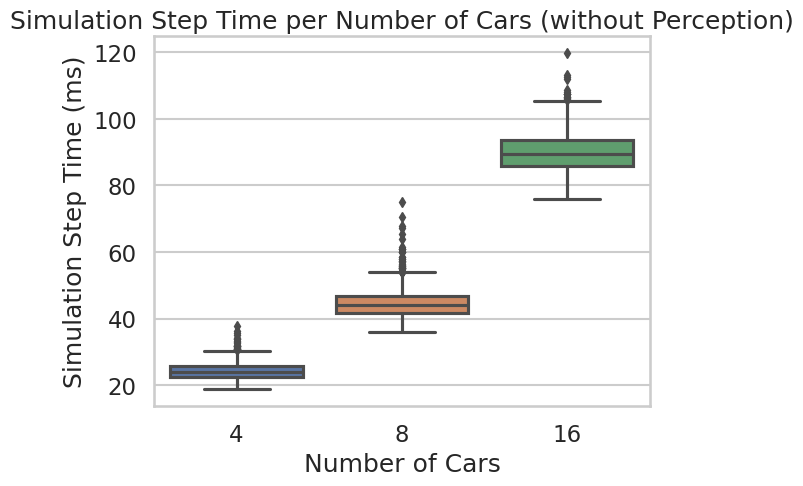

Saved file: ./evaluation_outputs/cumulative_stats_no_perception/step_time_scatterplot.png


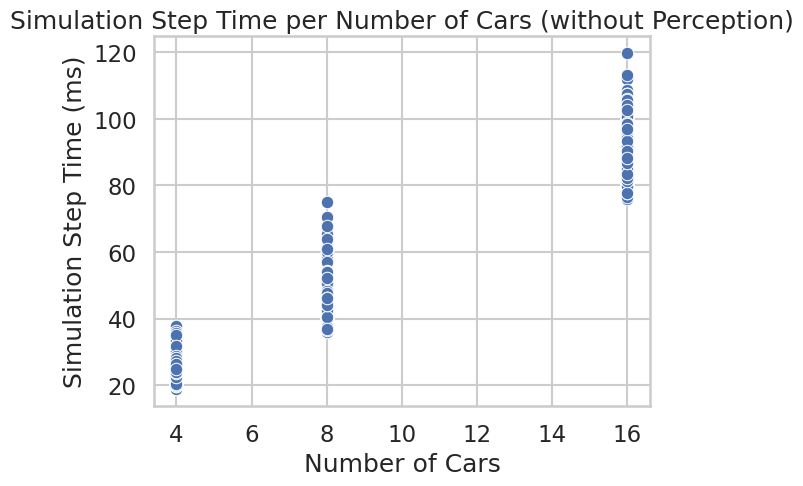

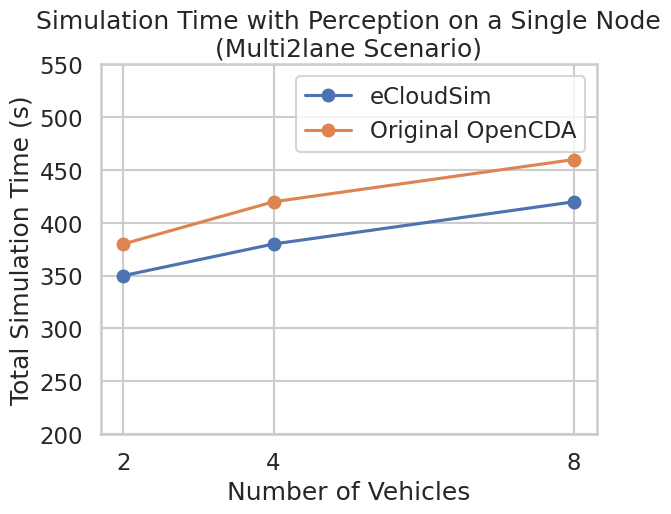

In [112]:
if __name__ == '__main__':
    # Plotting simulation total run time stats
    plot_simulation_time()

    # Plotting simulation step time stats
    plot_step_time()

   # Example DataFrame for comparison chart
    comparison_data = pd.DataFrame({
        'num_vehicles': [2, 4, 8],
        'eCloudSim': [350, 380, 420],
        'openCDA': [380, 420, 460]
    })

    # Plotting comparison chart
    plot_comparison_chart(comparison_data)